# Rf 5 0 1_Simultaneouspdf

Organization and simultaneous fits: using simultaneous p.d.f.s to describe simultaneous fits to multiple datasets




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:54 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


Create model for physics sample
-------------------------------------------------------------

Create observables

In [2]:
x = ROOT.RooRealVar("x", "x", -8, 8)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Construct signal pdf

In [3]:
mean = ROOT.RooRealVar("mean", "mean", 0, -8, 8)
sigma = ROOT.RooRealVar("sigma", "sigma", 0.3, 0.1, 10)
gx = ROOT.RooGaussian("gx", "gx", x, mean, sigma)

Construct background pdf

In [4]:
a0 = ROOT.RooRealVar("a0", "a0", -0.1, -1, 1)
a1 = ROOT.RooRealVar("a1", "a1", 0.004, -1, 1)
px = ROOT.RooChebychev("px", "px", x, ROOT.RooArgList(a0, a1))

Construct composite pdf

In [5]:
f = ROOT.RooRealVar("f", "f", 0.2, 0., 1.)
model = ROOT.RooAddPdf(
    "model", "model", ROOT.RooArgList(gx, px), ROOT.RooArgList(f))

Create model for control sample
--------------------------------------------------------------

Construct signal pdf.
NOTE that sigma is shared with the signal sample model

In [6]:
mean_ctl = ROOT.RooRealVar("mean_ctl", "mean_ctl", -3, -8, 8)
gx_ctl = ROOT.RooGaussian("gx_ctl", "gx_ctl", x, mean_ctl, sigma)

Construct the background pdf

In [7]:
a0_ctl = ROOT.RooRealVar("a0_ctl", "a0_ctl", -0.1, -1, 1)
a1_ctl = ROOT.RooRealVar("a1_ctl", "a1_ctl", 0.5, -0.1, 1)
px_ctl = ROOT.RooChebychev(
    "px_ctl", "px_ctl", x, ROOT.RooArgList(a0_ctl, a1_ctl))

Construct the composite model

In [8]:
f_ctl = ROOT.RooRealVar("f_ctl", "f_ctl", 0.5, 0., 1.)
model_ctl = ROOT.RooAddPdf(
    "model_ctl",
    "model_ctl",
    ROOT.RooArgList(
        gx_ctl,
        px_ctl),
    ROOT.RooArgList(f_ctl))

Generate events for both samples
---------------------------------------------------------------

Generate 1000 events in x and y from model

In [9]:
data = model.generate(ROOT.RooArgSet(x), 100)
data_ctl = model_ctl.generate(ROOT.RooArgSet(x), 2000)

Create index category and join samples
---------------------------------------------------------------------------

Define category to distinguish physics and control samples events

In [10]:
sample = ROOT.RooCategory("sample", "sample")
sample.defineType("physics")
sample.defineType("control")

False

Construct combined dataset in (x,sample)

In [11]:
combData = ROOT.RooDataSet(
    "combData",
    "combined data",
    ROOT.RooArgSet(x),
    ROOT.RooFit.Index(sample),
    ROOT.RooFit.Import(
        "physics",
        data),
    ROOT.RooFit.Import(
        "control",
        data_ctl))

Construct a simultaneous pdf in (x, sample)
-----------------------------------------------------------------------------------

Construct a simultaneous pdf using category sample as index

In [12]:
simPdf = ROOT.RooSimultaneous("simPdf", "simultaneous pdf", sample)

Associate model with the physics state and model_ctl with the control
state

In [13]:
simPdf.addPdf(model, "physics")
simPdf.addPdf(model_ctl, "control")

False

Perform a simultaneous fit
---------------------------------------------------

Perform simultaneous fit of model to data and model_ctl to data_ctl

In [14]:
simPdf.fitTo(combData)

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
RooAbsTestStatistic::initSimMode: creating slave calculator #0 for state physics (100 dataset entries)
RooAbsTestStatistic::initSimMode: creating slave calculator #1 for state control (2000 dataset entries)
[#1] INFO:Fitting -- RooAbsTestStatistic::initSimMode: created 2 slave calculators.
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (gx,px)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (gx_ctl,px_ctl)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a0          -1.00000e-01  2.00000e-01   -1.00000e+00  1.00000e+00
     2 a0_ctl      -1.00000e-01  2.00000e-01   -1.00000e+00  1.00000e+00
     3 a1           4.00000e-03  2.00000e-01   -1.00000e+00  1.00000e+00
     4 a1_ct

Plot model slices on data slices
----------------------------------------------------------------

Make a frame for the physics sample

In [15]:
frame1 = x.frame(ROOT.RooFit.Bins(30), ROOT.RooFit.Title("Physics sample"))

Plot all data tagged as physics sample

In [16]:
combData.plotOn(frame1, ROOT.RooFit.Cut("sample==sample::physics"))

<ROOT.RooPlot object ("frame_x_55dc9540d360") at 0x55dc9540d360>

[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 100 events out of 2100 total events


Plot "physics" slice of simultaneous pdf.
NB: You *must* project the sample index category with data using ProjWData
as a RooSimultaneous makes no prediction on the shape in the index category
and can thus not be integrated
NB2: The sampleSet *must* be named. It will not work to pass this as a temporary
because python will delete it. The same holds for fitTo() and plotOn() below.

In [17]:
sampleSet = ROOT.RooArgSet(sample)
simPdf.plotOn(frame1, ROOT.RooFit.Slice(sample, "physics"), ROOT.RooFit.Components(
    "px"), ROOT.RooFit.ProjWData(sampleSet, combData), ROOT.RooFit.LineStyle(ROOT.kDashed))

<ROOT.RooPlot object ("frame_x_55dc9540d360") at 0x55dc9540d360>

[#1] INFO:Plotting -- RooSimultaneous::plotOn(simPdf) plot on x represents a slice in the index category (sample)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (px)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsReal::plotOn(model) slice variable sample was not projected anyway


The same plot for the control sample slice

In [18]:
frame2 = x.frame(ROOT.RooFit.Bins(30), ROOT.RooFit.Title("Control sample"))
combData.plotOn(frame2, ROOT.RooFit.Cut("sample==sample::control"))
simPdf.plotOn(frame2, ROOT.RooFit.Slice(sample, "control"),
                ROOT.RooFit.ProjWData(sampleSet, combData))
simPdf.plotOn(frame2, ROOT.RooFit.Slice(sample, "control"), ROOT.RooFit.Components(
    "px_ctl"), ROOT.RooFit.ProjWData(sampleSet, combData), ROOT.RooFit.LineStyle(ROOT.kDashed))

c = ROOT.TCanvas("rf501_simultaneouspdf",
                 "rf501_simultaneouspdf", 800, 400)
c.Divide(2)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
frame1.GetYaxis().SetTitleOffset(1.4)
frame1.Draw()
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
frame2.GetYaxis().SetTitleOffset(1.4)
frame2.Draw()

c.SaveAs("rf501_simultaneouspdf.png")

[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 2000 events out of 2100 total events
[#1] INFO:Plotting -- RooSimultaneous::plotOn(simPdf) plot on x represents a slice in the index category (sample)
[#1] INFO:Plotting -- RooAbsReal::plotOn(model_ctl) slice variable sample was not projected anyway
[#1] INFO:Plotting -- RooSimultaneous::plotOn(simPdf) plot on x represents a slice in the index category (sample)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model_ctl) directly selected PDF components: (px_ctl)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model_ctl) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsReal::plotOn(model_ctl) slice variable sample was not projected anyway


Info in <TCanvas::Print>: png file rf501_simultaneouspdf.png has been created


Draw all canvases 

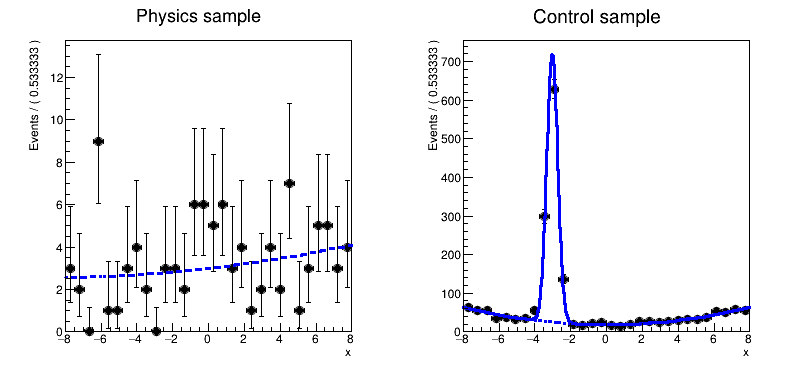

In [19]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()